# Random Forest 
## Machine learning algorithm to predict which patients are prone to brain hemorrhage based on medical diagostic data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Amit/data.csv')

## Dropping nulls
Checked the prediction with mean imputation as well; accuracy was almost same

In [ ]:
df = df.dropna()

## Random forest cant handle categorical

In [3]:
eatingMapping = {'Bad':0,'Poor':1,'Normal':2,'Good':3,'Excellent':4}

In [4]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['EatingHabit'] = df['EatingHabit'].map(eatingMapping)
df['BrainHemorrhage'] = number.fit_transform(df['BrainHemorrhage'].astype('str'))
df['BrainTumorPresent'] = number.fit_transform(df['BrainTumorPresent'].astype('str'))

## 80, 20 split between training test data

In [ ]:
# 80% - train set, 20% - test set
dfTrain, dfTest = np.split(df.sample(frac=1), [int(.8*len(df)),])

In [7]:
xTrain = dfTrain[['BloodPressure','CholesterolLevel','EatingHabit','BrainBloodVesselStrength','BrainTumorPresent']]
yTrain = dfTrain[['BrainHemorrhage']]

In [ ]:
# Checked the prediction with mean imputation as well; accuracy was almost same
# Random forest cant handle missing values
# xTrainRF = xTrain.apply(lambda x: x.fillna(x.mean()),axis=0)

## Model training

In [36]:
# increasing n_estimators upto 20 (best)
# min_samples_leaf=1 gives best 
from sklearn.ensemble import RandomForestClassifier
modelRandomForest = RandomForestClassifier(max_features= xTrain.columns.size, n_jobs= 4,min_samples_leaf=1, n_estimators=20,
                                           oob_score = True, random_state = 42)
modelRandomForest.fit(xTrain,yTrain)
pd.crosstab(dfTrain['BrainHemorrhage'], modelRandomForest.predict(xTrain), rownames=['actual'], colnames=['preds'])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


preds,0,1
actual,,
0,328332,47537
1,48261,328174


## Model testing

In [37]:
pd.crosstab(dfTest['BrainHemorrhage'], modelRandomForest.predict(xTest), rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,47324,46387
1,47750,46616


## Important contributing features in decreasing order of their weights

In [42]:
names = xTrain.columns
print sorted(zip(map(lambda x: round(x, 4), modelRandomForest.feature_importances_), names), 
             reverse=True)

[(0.324, 'CholesterolLevel'), (0.3229, 'BloodPressure'), (0.1875, 'BrainBloodVesselStrength'), (0.116, 'EatingHabit'), (0.0496, 'BrainTumorPresent')]


## Plot the feature importances of the forest

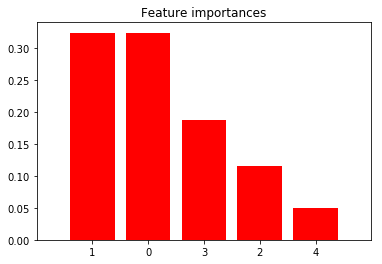

In [44]:
import matplotlib.pyplot as plt
importances = modelRandomForest.feature_importances_
std = np.std([modelRandomForest.feature_importances_ for tree in modelRandomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(xTrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(xTrain.shape[1]), indices)
plt.xlim([-1, xTrain.shape[1]])
plt.show()